#  BM20A6100 Advanced Data Analysis and Machine Learning
## Erik Kuitunen, 0537275

### Task 1
Visualize the data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("winequality-red.csv")
col_names = list( df.columns )
df_features = df.drop( "quality", axis =1 )     

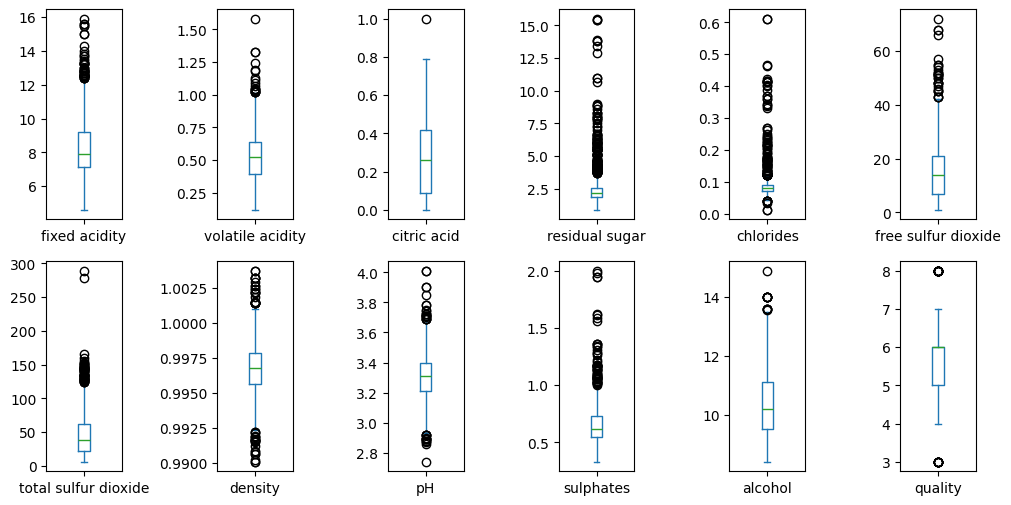

In [7]:
# Drawing boxplots of features
bp = df.plot(
    kind = 'box', 
    subplots = True, 
    sharey = False, 
    layout = (2, 6),
    figsize = (12, 6),
)

# Increase spacing between subplots
plt.subplots_adjust(wspace=1.25) 
plt.show()


### Task 2
Scale and center the dataset. Re-visualize the variable boxplots.

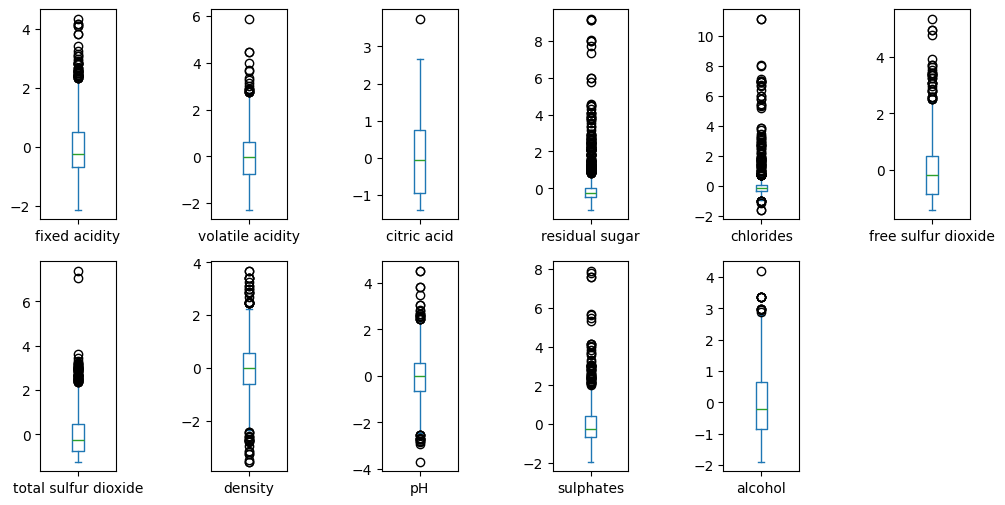

In [8]:
feature_means = df_features.mean( axis = 0 )
feature_std = df_features.std( axis=0 )
# feature_mins = df_features.min( axis = 0 )
# feature_maxs = df_features.max( axis = 0 )

df_scaled = ( df_features - feature_means ) / feature_std

bp_scaled = df_scaled.plot(
    kind = 'box', 
    subplots = True, 
    sharey = False, 
    layout = (2, 6),
    figsize = (12, 6),
)

# Increase spacing between subplots
plt.subplots_adjust(wspace=1.25) 
plt.show()

### Task 3
Apply PCA on the model. Treat all variables as independent (input) variables.

In [9]:
x = df_scaled.loc[ :, col_names[0:-1] ].values

U, S, Vt = np.linalg.svd(x, full_matrices = False)

loadings = Vt
scores = np.matmul( U, np.diag(S) )


### Task 4
Visualize and comment the variation explained by the model with different no. PCs. Think of an explanation.

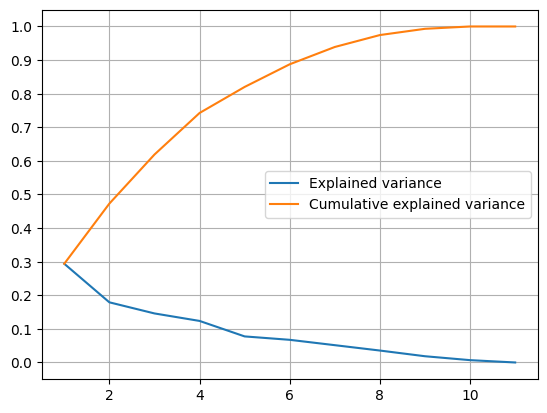

In [17]:
pc_nums = np.arange( len(S) ) + 1
 

cov_X = np.cov(x)
U, S_cov, V = np.linalg.svd( cov_X )

S_cov = S_cov[ pc_nums - 1 ]
explained_variances = S_cov / sum( S_cov )
cum_explained_variances = np.cumsum( S_cov ) / sum( S_cov )

plt.plot( pc_nums, explained_variances, label = "Explained variance" )
plt.plot( pc_nums, cum_explained_variances, label = "Cumulative explained variance" )

#plt.title( "Explained variance of components" )
plt.yticks( np.arange( 0, 1.1, step = 0.1 ) )
plt.grid()
plt.legend( loc = 'center right' )

plt.show()




### Task 5
Compute the biplot of the first two principal components and explain covariances on it. Comment the biplot.